In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib notebook

In [14]:
data = pd.read_csv('master_df_bloom_figure.csv')
data = data.dropna(axis=0)
data.shape

(9115, 3)

In [15]:
data.head()

,year,type,gpw
3,2007,NVIDIA GPU,0.550000
4,2007,NVIDIA GPU,1.075000
5,2007,NVIDIA GPU,1.320000
6,2009,NVIDIA GPU,1.220000
7,2007,NVIDIA GPU,0.955556


In [16]:
data.year.value_counts()

2008    1510
2012    1020
2010    1019
2014    1014
2011    1014
2013    1013
2009    1008
2015    1004
2007     512
2016       1
Name: year, dtype: int64

In [17]:
data.type.value_counts()

supercomputer    9003
NVIDIA GPU        112
Name: type, dtype: int64

# Basic Plot

In [18]:
# _, ax = plt.subplots(figsize=(8, 6))
# sb.boxplot(data=data, x='year', y='gpw', hue='type', ax=ax)
# ax.set_yscale("log", nonposy='clip')

In [19]:
# _, ax = plt.subplots(figsize=(8, 6))
# sb.boxplot(data=data, x='year', y='gpw', hue='type', ax=ax)

In [20]:
# sb.lmplot(x='year', y='gpw', hue='type', order=2, data=data)

# Interactive Scale

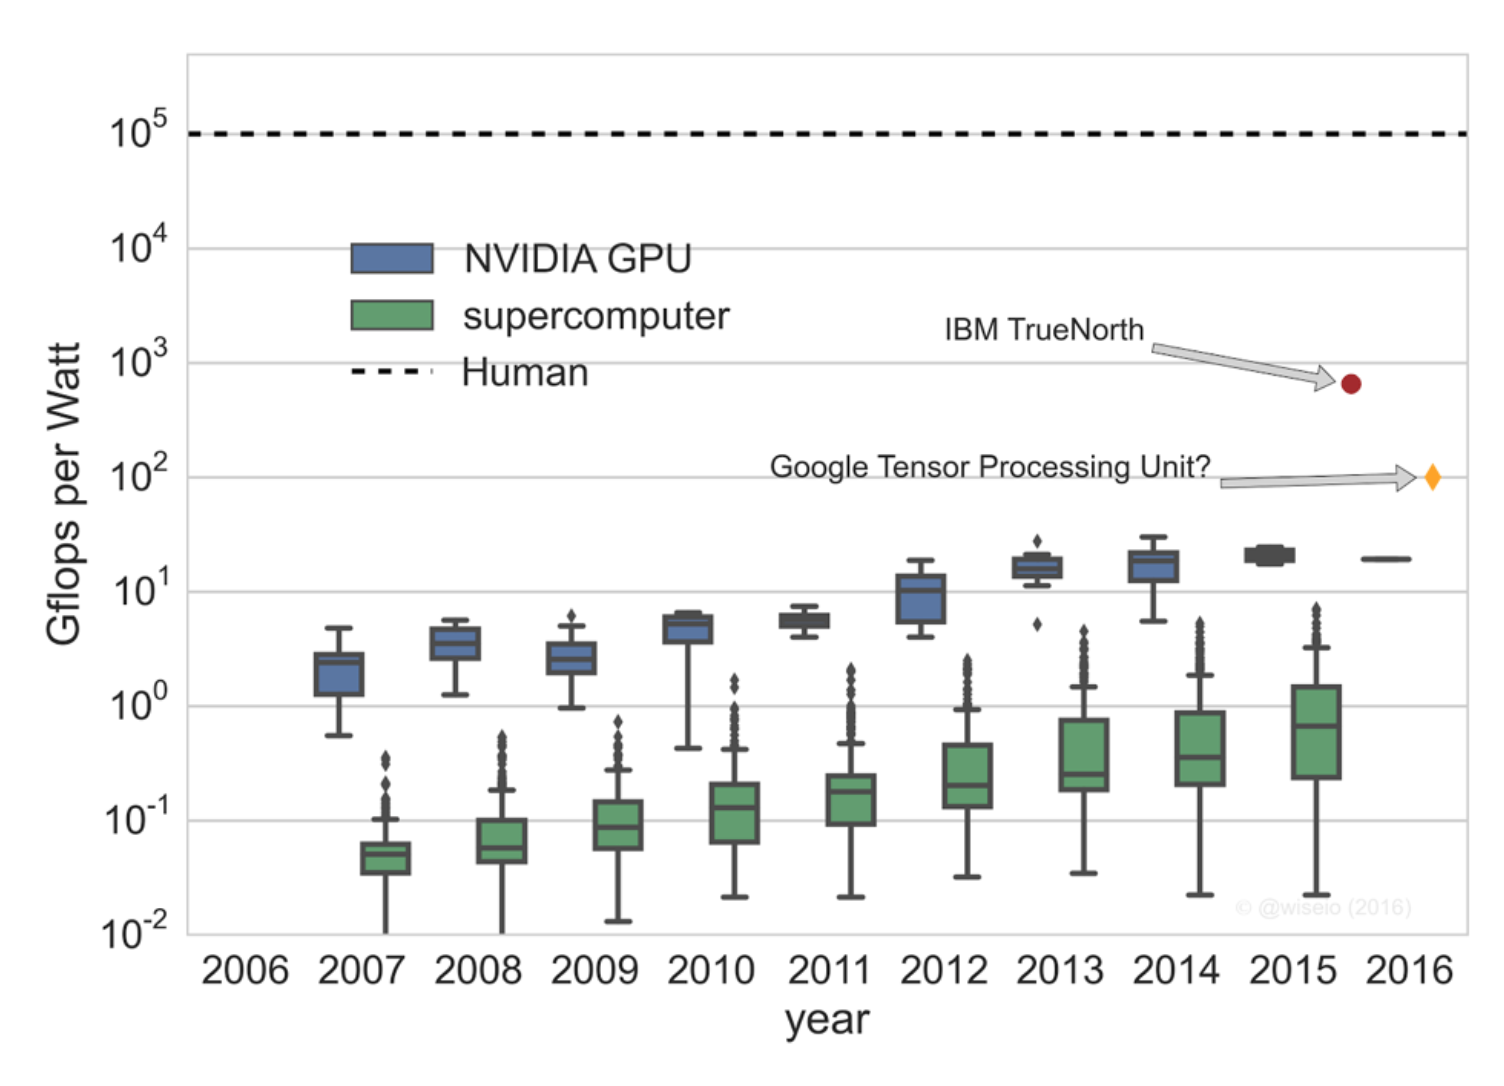

In [21]:
from IPython.display import Image
Image(filename='target_plot.png') 

<IPython.core.display.Javascript object>


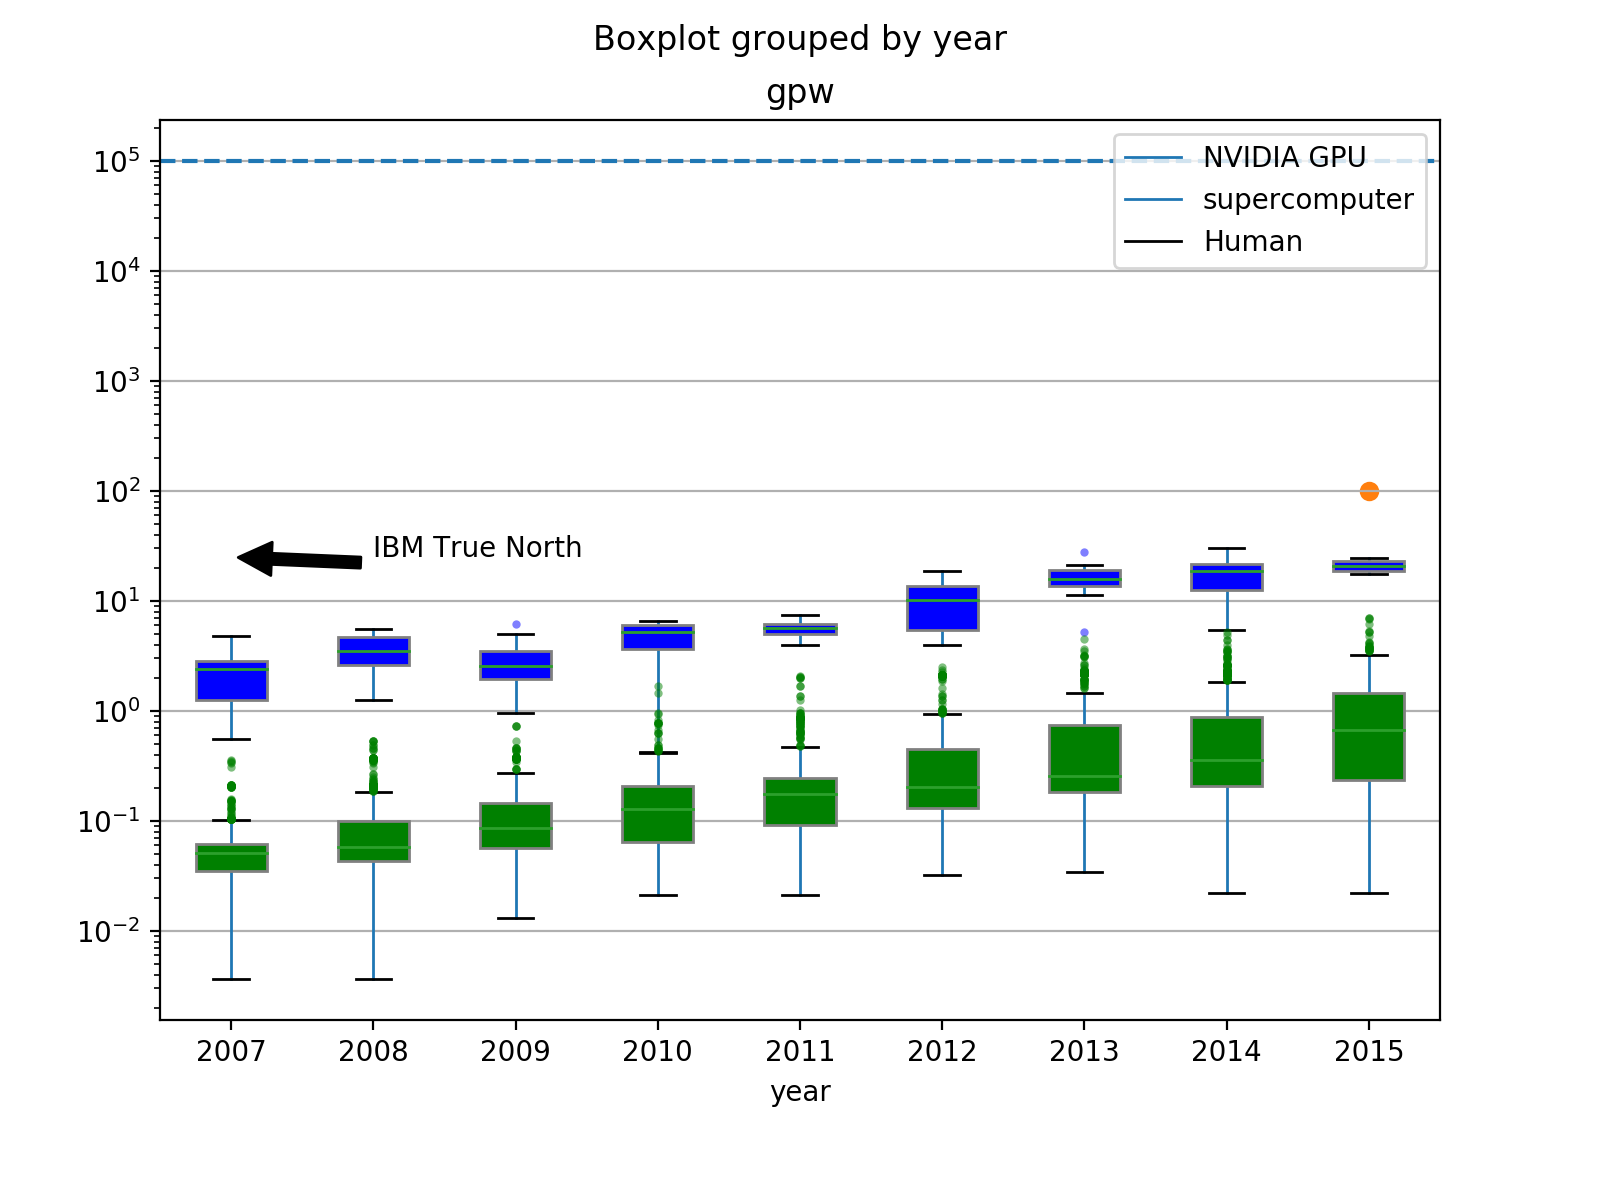

Dropdown(description='Scale:', options=('Log', 'Linear'), value='Log')

In [22]:
# TODO log scale
# TODO horizontal line for human
# TODO dots + arrows
# TODO select scale in dropdown (log/linear), pywidgets
# https://stackoverflow.com/questions/34020789/ipywidgets-dropdown-widgets-what-is-the-onchange-event
# https://pythonspot.com/matplotlib-update-plot/
from ipywidgets import widgets

plt.ion()
fig, ax = plt.subplots(figsize=(8, 6))

# Boxplots
labels = []
colors = {'NVIDIA GPU': 'blue', 'supercomputer': 'green'}
for cmpt_type, grp in data.groupby('type'):
    labels.append(cmpt_type)
    bxplt = grp.boxplot(column='gpw', by='year', patch_artist=True,
                        return_type='dict', ax=ax)['gpw']

    # Set color
    clr = colors[cmpt_type]
    for patch in bxplt['boxes']:
        patch.set_facecolor(clr)
        patch.set_edgecolor('gray')
        patch.set_linewidth(1)
    handels.append(patch)

    for flier in bxplt['fliers']:
        flier.set(marker='.', markerfacecolor=clr, markeredgewidth=0, alpha=0.5)  

# Human
human_line = ax.axhline(1e5, linestyle='--')

# Points
ax.annotate('IBM True North', xy=(1, 25), xytext=(2, 25),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Settings
ax.scatter(10, 9e2)
ax.scatter(9, 1e2)
ax.set_yscale('log', nonposy='clip')
ax.grid(False)
ax.yaxis.grid(True)
ax.legend(labels + ['Human'])
fig.canvas.draw()

w = widgets.Dropdown(
    options=['Log', 'Linear'],
    value='Log',
    description='Scale:',
)

lin_ylim = (.9*data['gpw'].min(), 1.1*data['gpw'].max())
log_ylim = ax.get_ylim()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        if change['new'] == 'Log':
            ax.set_yscale('log', nonposy='clip')
            human_line.set_visible(True)
            ax.set_ylim(log_ylim)
        else:
            ax.set_yscale('linear', nonposy='clip')
            human_line.set_visible(False)
            ax.set_ylim(lin_ylim)
            

w.observe(on_change)

display(w)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(x)
 
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'b-') 
 
for phase in np.linspace(0, 10*np.pi, 100):
    line1.set_ydata(np.sin(0.5 * x + phase))
    fig.canvas.draw()

# Widgets

In [ ]:
from ipywidgets import widgets
text = widgets.Text()
display(text)

def submit(sender):
    print(text.value)
    
text.on_submit(submit)

In [ ]:
from ipywidgets import widgets

fig, ax = plt.subplots(figsize=(10, 8))

def plot_boxplot(gpu_on, super_on):
    colors = {'NVIDIA GPU': 'blue', 'supercomputer': 'green'}
    labels = []

    for cmpt_typ, grp in data.groupby('type'):
        if 'GPU' in cmpt_typ and not gpu_on:
            continue
        elif 'super' in cmpt_typ and not super_on:
            continue

        labels.append(cmpt_typ)
        bxplt = grp.boxplot(column='gpw', by='year', patch_artist=True,
                            return_type='dict', ax=ax)['gpw']

        # Set color
        clr = colors[cmpt_typ]
        for patch in bxplt['boxes']:
            patch.set_facecolor(clr)
            patch.set_edgecolor('gray')
            patch.set_linewidth(1)

        for flier in bxplt['fliers']:
            flier.set(marker='.', markerfacecolor=clr, markeredgewidth=0, alpha=0.5)

    ax.grid(None)  
    fig.legend(labels)
    ax.set_yscale('log')
    ax.set_title('Computer GPW Growth')
    fig.suptitle('')
    ax.set_ylabel('gpw')

# Check buttons
ckbx1 = widgets.Checkbox(description='GPU', value=True)
ckbx2 = widgets.Checkbox(description='supercomputer', value=True)

def clicked(evt):
    print(ckbx1.value, ckbx2.value)
    fig.clear()
    ax.clear()
    fig.canvas.draw_idle()
    plot_boxplot(ckbx1.value, ckbx2.value)

ckbx1.on_trait_change(clicked)
ckbx2.on_trait_change(clicked)

plot_boxplot(ckbx1.value, ckbx2.value)
display(ckbx1)
display(ckbx2)

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact

def f(n):
    plt.plot([0,1,2],[0,1,n])
    plt.show()
interact(f, n=(0,10))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
%matplotlib notebook

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2)
l1, = ax.plot(t, s1, lw=2)
l2, = ax.plot(t, s2, lw=2)
plt.subplots_adjust(left=0.3)

rax = plt.axes([0.05, 0.4, 0.1, 0.15])
check = CheckButtons(rax, ('2 Hz', '4 Hz', '6 Hz'), (False, True, True))


def func(label):
    if label == '2 Hz':
        l0.set_visible(not l0.get_visible())
    elif label == '4 Hz':
        l1.set_visible(not l1.get_visible())
    elif label == '6 Hz':
        l2.set_visible(not l2.get_visible())
    plt.draw()
check.on_clicked(func)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

def plot_gpw(gpu_on, super_on):
    df = data
    if not gpu_on:
        df = df[~df.type.str.contains('GPU')]
    if not super_on:
        df = df[~df.type.str.contains('super')]
        
    sb.boxplot(data=df, x='year', y='gpw', hue='type', ax=ax)
    ax.set_yscale('log')
    plt.subplots_adjust(left=0.2)

check = CheckButtons(ax, ('GPU', 'super'), (True, True))

def func(label):
    if label == 'GPU':
        l0.set_visible(not l0.get_visible())
    elif label == 'super':
        l1.set_visible(not l1.get_visible())
    plt.draw()

check.on_clicked(func)

plt.show()